In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
df=pd.read_csv('E:\Projects\Data Science\cv_projects\Breast Cancer/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
df.shape

(569, 33)

In [71]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [72]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [73]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### Diagnosis (malignant or benign)


Number of Benign:  357
Number of Malignant :  212


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


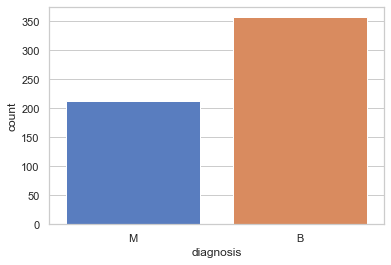

In [74]:
sns.countplot(df.diagnosis)
B,M=df.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [75]:
y = df.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

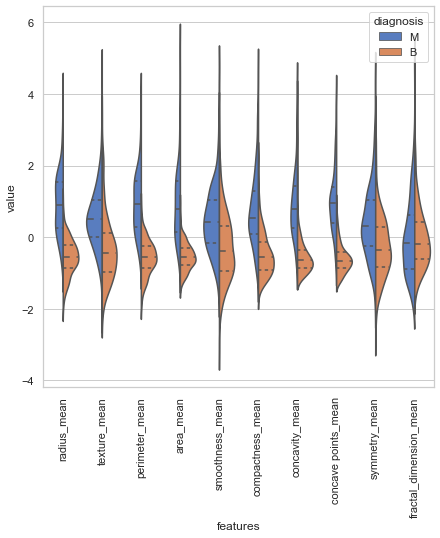

In [77]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization 
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

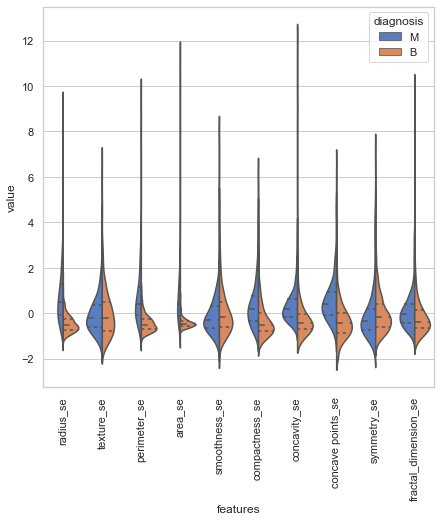

In [78]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

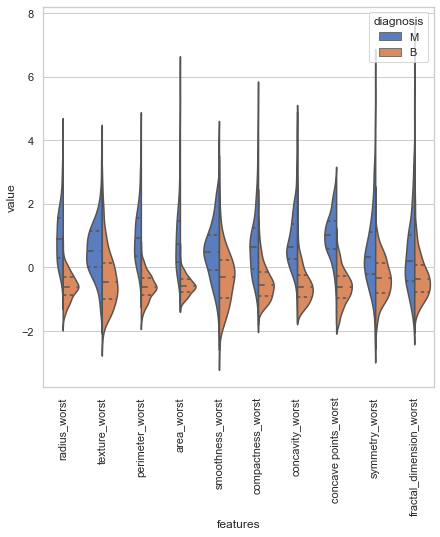

In [79]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

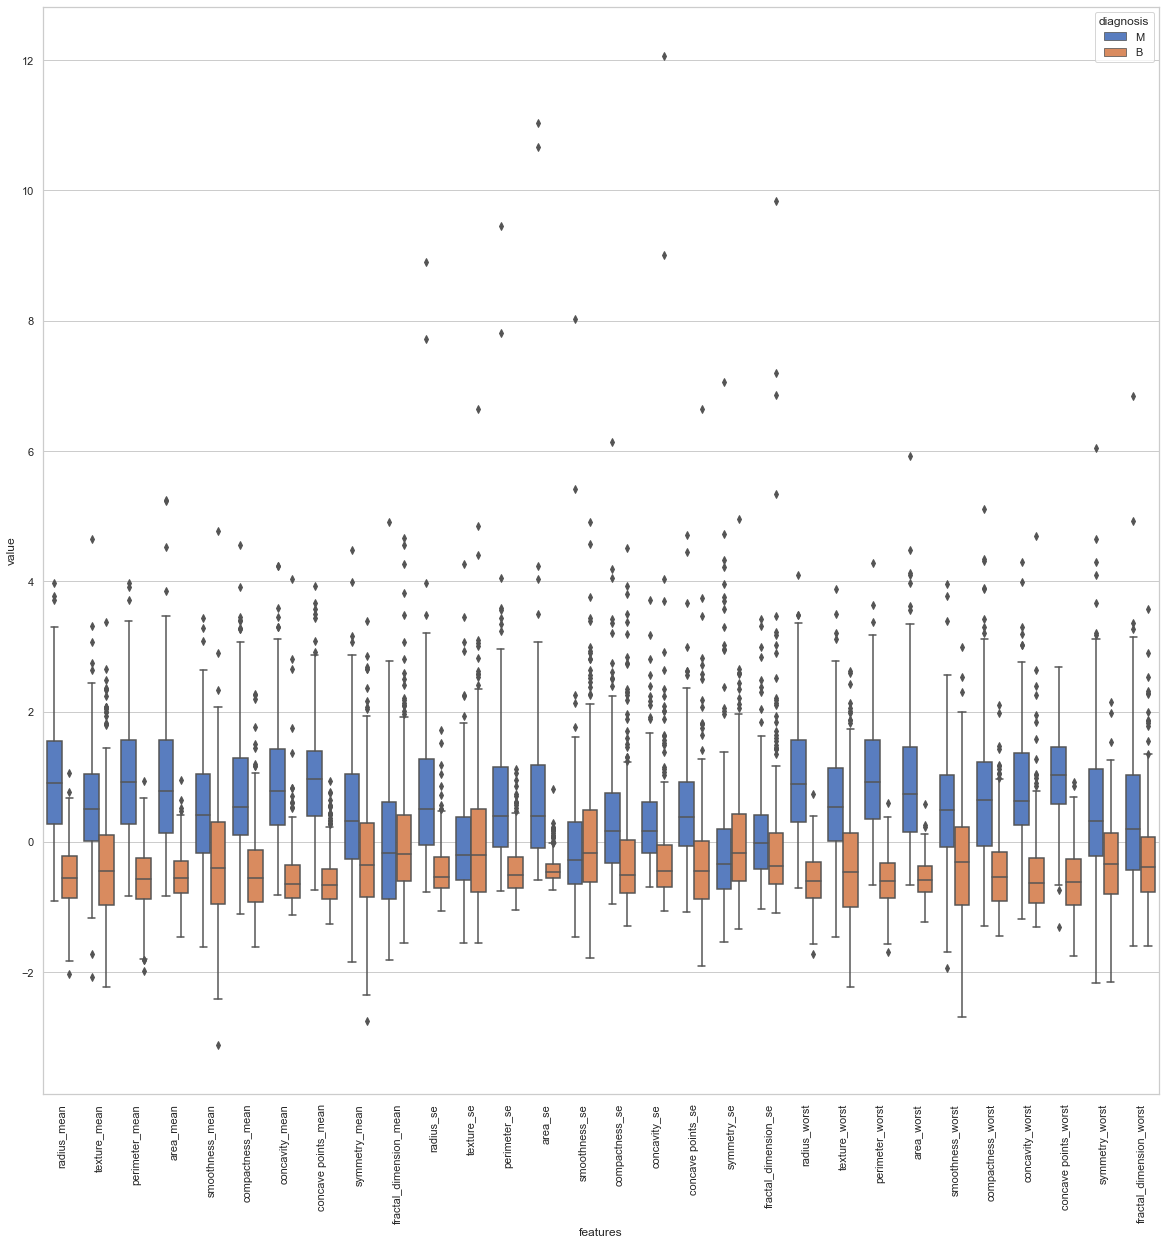

In [80]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization 
data = pd.concat([y,data_n_2.iloc[:,0:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

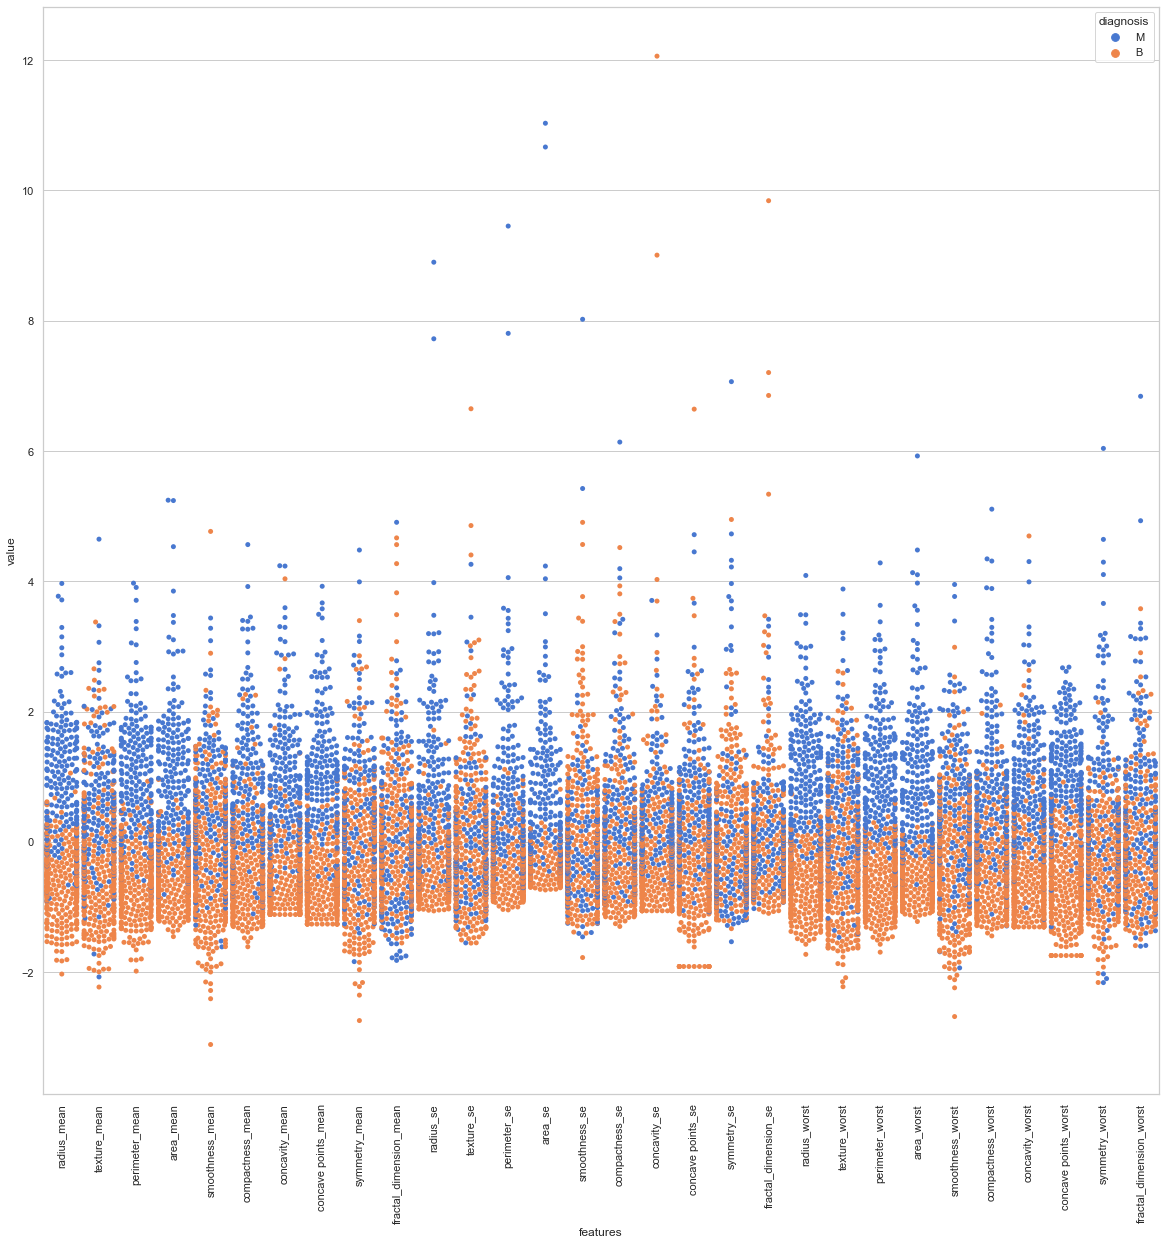

In [81]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)


# Feature Engineer

## area_se Outliers

In [82]:
df.area_se.describe()

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64

In [83]:
lowest,highest=df.area_se.quantile([0.01,0.99])
lowest,highest

(8.51444, 177.68400000000017)

In [84]:
droped_idx=df[(df.area_se>highest) | (df.area_se<lowest)].index
df.drop(droped_idx,inplace=True)

## concavity_se Outliers

In [85]:
df.concavity_se.describe()

count    557.000000
mean       0.031459
std        0.029660
min        0.000000
25%        0.014650
50%        0.025860
75%        0.041670
max        0.396000
Name: concavity_se, dtype: float64

In [86]:
lowest,highest=df.concavity_se.quantile([0.01,0.99])
lowest,highest

(0.0, 0.11368799999999969)

In [87]:
droped_idx=df[(df.concavity_se>highest) | (df.concavity_se<lowest)].index
df.drop(droped_idx,inplace=True)

##  fractal_dimension_se Outliers

In [88]:
df.fractal_dimension_se.describe()

count    551.000000
mean       0.003642
std        0.002218
min        0.000895
25%        0.002220
50%        0.003121
75%        0.004440
max        0.022860
Name: fractal_dimension_se, dtype: float64

In [89]:
lowest,highest=df.fractal_dimension_se.quantile([0.01,0.99])
lowest,highest

(0.0011065, 0.01139)

In [90]:
droped_idx=df[(df.fractal_dimension_se>highest) | (df.fractal_dimension_se<lowest)].index
df.drop(droped_idx,inplace=True)

##  symmetry_se Outliers

In [91]:
df.symmetry_se.describe()

count    539.000000
mean       0.020236
std        0.007925
min        0.007882
25%        0.015015
50%        0.018680
75%        0.022935
max        0.078950
Name: symmetry_se, dtype: float64

In [92]:
lowest,highest=df.symmetry_se.quantile([0.01,0.99])
lowest,highest

(0.0105438, 0.05270300000000001)

In [93]:
droped_idx=df[(df.symmetry_se>highest) | (df.symmetry_se<lowest)].index
df.drop(droped_idx,inplace=True)

# Build Model 

In [94]:
x_train,x_test,y_Train,y_Test=train_test_split(df.drop(['diagnosis','Unnamed: 32'],axis=1),df.diagnosis,test_size=0.2)

In [95]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_Train)
knn.score(x_test,y_Test)

0.7358490566037735

In [96]:
random_Forest_model=RandomForestClassifier(n_estimators=40)
random_Forest_model.fit(x_train,y_Train)
random_Forest_model.score(x_test,y_Test)

0.9811320754716981

Accuracy is:  0.9811320754716981


<AxesSubplot:>

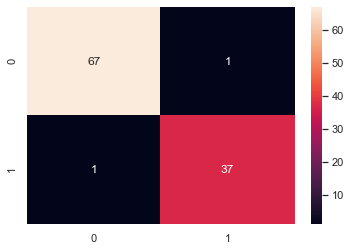

In [97]:
ac = accuracy_score(y_Test,random_Forest_model.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_Test,random_Forest_model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.7358490566037735


<AxesSubplot:>

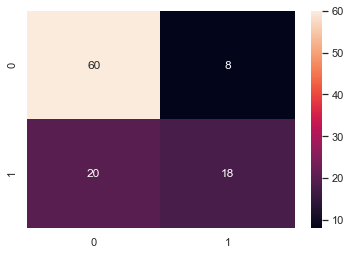

In [98]:
ac = accuracy_score(y_Test,knn.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_Test,knn.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")